<h1> COGS 108- Final Project </h1>
<h2> Predicting adoption rates </h2>

<h1> Overview </h1>

   <h2> Names: </h2>     
  
Lulu Ricketts

George Pu

Lisiman Hua

Erica Iniguiz

Cameron Thomas

Samuel Reda

<h2> Group Member IDs </h2>

A15380637 (Lulu)

A15405062 (George)

A14055217 (Lisiman)

A15054445 (Erica)

A13978010 (Cameron)

A15727501 (Samuel)

<h2> Research Question </h2>

Are there underlying trends between certain attributes that may entice a person to adopt a specific dog/cat over another?

<h2> Background and Prior work </h2>


From experience, there are certainly animal attributes that stick out when either adopting or seeing a dog in public. We feel as if there are certain traits that push an owner to adopt one dog over another. We want to find data-backed solutions for this commonly asked question which can explain what attributes entice owners (and our findings can even be commonly applied/linked to what attributes make a person stare at an animal longer when being seen).

Prior to starting this project, we all have a relative understanding of animal attributes that are more appealing/eye-catching than other traits. Some of us own animals and were faced with a similar challenge when choosing an animal based off impressions, attributes and fit to bring home and adopt. We are well aware that there tends to be several biases when choosing a dog due to personal preference but there may also be additional factors in which we will explore. For example, there is a stigma against pitbulls due to the stereotype that they are aggressive dogs. Through the data sets we will be able to see if this holds true within the Austin Animal Shelter. The data is taken from the Austin Animal Shelter intakes/outcomes of adoption. There are 3 main datasets: all_records, the intakes, and outcomes of the shelter. We can use the dog’s age, fixed status, breed (might be more difficult since there’s so many mixes), length of stay and mapped onto the outcome type. Outcome types are limited to adoption, euthanasia, transfer, or return to owner. Through this we will be able to analyze any trends within any breed.

A similar project (https://www.statesman.com/news/20160903/crowded-austin-animal-shelter-has-turned-away-some-healthy-dogs-cats) has been done and can be found online. A group of UTAustin students did a project on the same set of data and found some correlations between certain attributes. They find out that in comparison to cats, dogs are more likely to be adopted. Different traits of dogs and cats do affect the adoption rate. We hope to further this analysis in terms of analyzing adoption outcomes and will take several approaches to assess these trends. With the analytic outcomes, we are expecting to give helpful suggestions to Austin Animal Shelter to run the program more efficiently, since local news is reporting that the shelter is turning away healthy dogs and cats due to its limited capacity.

<h2> Hypothesis </h2>

We predict that dogs and cats that are one year old, light-colored, and with names will have shorter shelter stay times or more likely to be adopted in Austin, Texas.


Explanation:

We think this because younger dogs tend to be more appealing. People are less likely to adopt an older pet in fear that their time spent together will be limited because the lifespan of dogs are relatively short compared to humans. Because black dogs do not photograph well, lighter-colored dogs have an advantage with potential adopters browsing adoption websites. When it is difficult to see the expression on a black dog’s face, a potential adopter has trouble determining the animal’s personality. In addition, the color black has negative connotations. For example, black cats are associated with bad luck. In many cultures, a black dog’s appearance is regarded as a portent of death or evil and can come in the form of a shapeshifter, ghost, hellhound, or the Devil. Why black and male? Black dogs are less likely to be adopted (https://www.gopetplan.com/blogpost/black-dog-syndrome). Lastly, dogs and cats that have names will be able to create a friendlier and more personal emotional attraction to the future owner.

<h2> Datasets </h2>


* **Dataset Name:** Austin Animal Shelter Intakes and Outcomes
* **Link to the dataset:** <a href= https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#> Kaggle link </a>


1. aac_intakes_outcomes.csv

This dataset is a combination of the aac_intakes.csv and aac_outtakes.csv. At first, we tried using those two and merging them, but information was lost and inaccurate when we merged those datasets on "Animal ID" because several animals have been in and out of the shelter multiple times with the same animal ID. We decided to use this one because it had more numerical data to work with and was more accurate

* Number of observations: 71,961 rows
* Information included: basic information of each animal (specific ID given, age, breed, sex, color) and information about the intake time, outcome time and time spent in shelter


1. aac_outcomes.csv
This dataset contains only outcomes but has the additional information about the name attribute that we want to explore.


* Number of observations: 110,753 rows
* Features included: basic information of each animal (specific ID given, age, breed, sex, color) and information about the outcome time

<h1> Exploratory Data Analysis </h1>

<h4> First, We will import the necessary packages to run Exploratory Data Analysis </h4>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h4> Then we will read the CSV file, and clean the dataset as needed
   

In [25]:
df = pd.read_csv('aac_intakes_outcomes.csv', index_col='animal_id_outcome')
df.index.rename('Animal ID', inplace=True)
df.head()

,age_upon_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
Animal ID,,,,,,,,,,,,,,,,,,,,,
A006100,10 years,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
A006100,7 years,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
A006100,6 years,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
A047759,10 years,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
A134067,16 years,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [26]:
#look at columns
df.columns.values

array(['age_upon_outcome', 'date_of_birth', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed',
       'color', 'found_location', 'intake_condition', 'intake_type',
       'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year',
       'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype=object)

In [27]:
#for our purposes, we don't need DOB information, outcome subtype, found location and some others
df.drop(['date_of_birth', 'outcome_subtype', 'dob_year', 'dob_month', 'dob_monthyear', 
         'found_location', 'outcome_number', 'intake_number', 'animal_id_intake'], axis=1, inplace=True)

In [28]:
#let's rename the columns we do have
print(df.columns.values)
df.columns = ['Outcome Age', 'Outcome Type', 'Sex Upon Outcome',
 'Outcome Age (days)', 'Outcome Age (years)', 'Outcome Age Group', 'outcome_datetime',
 'Outcome Month', 'Outcome Year', 'Outcome MY', 'Outcome Weekday',
 'Outcome Hour',  'Intake Age', 
 'Animal Type', 'Breed', 'Color', 'Intake Condition', 'Intake Type',
 'Sex Upon Intake', 'Count', 'Intake Age (days)',
 'Intake Age (years)', 'Intake Age Group', 'Intake DateTime', 'Intake Month', 'Intake Year',
 'Intake MY', 'Intake Weekday', 'Intake Hour',
 'Time in Shelter', 'Time in Shelter (days)']
print(df.columns.values)

['age_upon_outcome' 'outcome_type' 'sex_upon_outcome'
 'age_upon_outcome_(days)' 'age_upon_outcome_(years)'
 'age_upon_outcome_age_group' 'outcome_datetime' 'outcome_month'
 'outcome_year' 'outcome_monthyear' 'outcome_weekday' 'outcome_hour'
 'age_upon_intake' 'animal_type' 'breed' 'color' 'intake_condition'
 'intake_type' 'sex_upon_intake' 'count' 'age_upon_intake_(days)'
 'age_upon_intake_(years)' 'age_upon_intake_age_group' 'intake_datetime'
 'intake_month' 'intake_year' 'intake_monthyear' 'intake_weekday'
 'intake_hour' 'time_in_shelter' 'time_in_shelter_days']
['Outcome Age' 'Outcome Type' 'Sex Upon Outcome' 'Outcome Age (days)'
 'Outcome Age (years)' 'Outcome Age Group' 'outcome_datetime'
 'Outcome Month' 'Outcome Year' 'Outcome MY' 'Outcome Weekday'
 'Outcome Hour' 'Intake Age' 'Animal Type' 'Breed' 'Color'
 'Intake Condition' 'Intake Type' 'Sex Upon Intake' 'Count'
 'Intake Age (days)' 'Intake Age (years)' 'Intake Age Group'
 'Intake DateTime' 'Intake Month' 'Intake Year' 'Inta

In [29]:
#make sure everything looks right
df.describe()

,Outcome Age (days),Outcome Age (years),Outcome Month,Outcome Year,Outcome Hour,Count,Intake Age (days),Intake Age (years),Intake Month,Intake Year,Intake Hour,Time in Shelter (days)
count,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.0,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000
mean,782.046127,2.142592,6.655425,2015.472563,14.297306,1.0,769.341701,2.107785,6.584032,2015.436101,13.487022,16.757116
std,1058.528519,2.900078,3.414284,1.305944,3.774317,0.0,1056.009040,2.893175,3.366579,1.303157,3.121173,41.679359
min,0.000000,0.000000,1.000000,2013.000000,0.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,0.000000
25%,90.000000,0.246575,4.000000,2014.000000,12.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.102083
50%,365.000000,1.000000,7.000000,2015.000000,15.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,4.987153
75%,1095.000000,3.000000,10.000000,2017.000000,17.000000,1.0,1095.000000,3.000000,10.000000,2017.000000,16.000000,13.610764
max,9125.000000,25.000000,12.000000,2018.000000,23.000000,1.0,9125.000000,25.000000,12.000000,2018.000000,23.000000,1606.194444


We notice that some of the outcome and intake ages have 0 values

In [30]:
print('Outcome Age (days) is 0:  ', sum(df['Outcome Age (days)'] == 0))
print('Outcome Age (years) is 0: ', sum(df['Outcome Age (years)'] == 0))
print('Intake Age (days) is 0:   ', sum(df['Intake Age (days)'] == 0))
print('Intake Age (years) is 0:  ', sum(df['Intake Age (years)'] == 0))

Outcome Age (days) is 0:   94
Outcome Age (years) is 0:  94
Intake Age (days) is 0:    450
Intake Age (years) is 0:   450


Since there isn't a significant amount, we can drop those rows

In [31]:
df.drop(df[df['Outcome Age (days)'] == 0].index, inplace=True, axis=0)
df.drop(df[df['Intake Age (years)'] == 0].index, inplace=True, axis=0)

In [32]:
#make sure there's no more
print('Outcome Age (days) is 0:  ', sum(df['Outcome Age (days)'] == 0))
print('Outcome Age (years) is 0: ', sum(df['Outcome Age (years)'] == 0))
print('Intake Age (days) is 0:   ', sum(df['Intake Age (days)'] == 0))
print('Intake Age (years) is 0:  ', sum(df['Intake Age (years)'] == 0))

Outcome Age (days) is 0:   0
Outcome Age (years) is 0:  0
Intake Age (days) is 0:    0
Intake Age (years) is 0:   0


Let's look at the numerical values again, it looks a lot better now

In [33]:
df.describe()

,Outcome Age (days),Outcome Age (years),Outcome Month,Outcome Year,Outcome Hour,Count,Intake Age (days),Intake Age (years),Intake Month,Intake Year,Intake Hour,Time in Shelter (days)
count,79203.000000,79203.000000,79203.000000,79203.000000,79203.000000,79203.0,79203.000000,79203.000000,79203.000000,79203.000000,79203.000000,79203.000000
mean,786.467280,2.154705,6.656124,2015.472293,14.300797,1.0,773.820777,2.120057,6.585003,2015.436044,13.488795,16.670654
std,1060.074017,2.904312,3.416657,1.306271,3.770535,0.0,1057.502961,2.897268,3.368998,1.303712,3.117224,41.685701
min,1.000000,0.002740,1.000000,2013.000000,0.000000,1.0,1.000000,0.002740,1.000000,2013.000000,0.000000,0.000000
25%,90.000000,0.246575,4.000000,2014.000000,12.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.102083
50%,365.000000,1.000000,7.000000,2015.000000,15.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,4.984028
75%,1095.000000,3.000000,10.000000,2017.000000,17.000000,1.0,1095.000000,3.000000,10.000000,2017.000000,16.000000,13.248958
max,9125.000000,25.000000,12.000000,2018.000000,23.000000,1.0,9125.000000,25.000000,12.000000,2018.000000,23.000000,1606.194444


When looking at the data, we noticed that there are duplicates of animals on the ID

In [34]:
print("Does there exist duplicates?")
print(df[df.index.duplicated() == True])

Does there exist duplicates?
          Outcome Age     Outcome Type Sex Upon Outcome  Outcome Age (days)  \
Animal ID                                                                     
A006100       7 years  Return to Owner    Neutered Male                2555   
A006100       6 years  Return to Owner    Neutered Male                2190   
A245945      14 years  Return to Owner    Neutered Male                5110   
A282897      12 years         Adoption    Neutered Male                4380   
A287017      13 years  Return to Owner    Spayed Female                4745   
...               ...              ...              ...                 ...   
A768895       1 month         Adoption    Spayed Female                  30   
A768899       3 years  Return to Owner    Neutered Male                1095   
A768908      6 months         Adoption    Spayed Female                 180   
A768910       4 years         Adoption    Neutered Male                1460   
A768917        1 year  

<h4> When looking further, the duplicated values are different instances where the same animal entered and exited the shelther, so there is no need to drop those rows

In [35]:
df.columns.values

array(['Outcome Age', 'Outcome Type', 'Sex Upon Outcome',
       'Outcome Age (days)', 'Outcome Age (years)', 'Outcome Age Group',
       'outcome_datetime', 'Outcome Month', 'Outcome Year', 'Outcome MY',
       'Outcome Weekday', 'Outcome Hour', 'Intake Age', 'Animal Type',
       'Breed', 'Color', 'Intake Condition', 'Intake Type',
       'Sex Upon Intake', 'Count', 'Intake Age (days)',
       'Intake Age (years)', 'Intake Age Group', 'Intake DateTime',
       'Intake Month', 'Intake Year', 'Intake MY', 'Intake Weekday',
       'Intake Hour', 'Time in Shelter', 'Time in Shelter (days)'],
      dtype=object)

<h3> We're interested in pets that are adopted

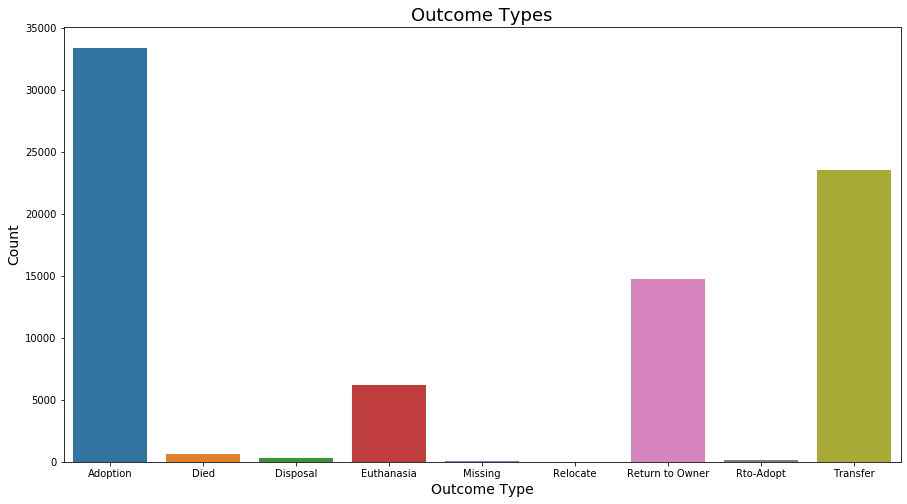

In [36]:
df_outcomes = df.groupby('Outcome Type')[['Count']].sum()
plt.figure(figsize=(15,8))
sns.barplot(x=df_outcomes.index, y=df_outcomes['Count'])
plt.title('Outcome Types', fontsize=18)
plt.xlabel('Outcome Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

We see that adoption is by far the most popular outcome type, so we will now limit out analysis to animals that have been adopted

In [37]:
df_adopted = df[df['Outcome Type'] == 'Adoption']
df_adopted.head()

,Outcome Age,Outcome Type,Sex Upon Outcome,Outcome Age (days),Outcome Age (years),Outcome Age Group,outcome_datetime,Outcome Month,Outcome Year,Outcome MY,...,Intake Age (years),Intake Age Group,Intake DateTime,Intake Month,Intake Year,Intake MY,Intake Weekday,Intake Hour,Time in Shelter,Time in Shelter (days)
Animal ID,,,,,,,,,,,,,,,,,,,,,
A200922,16 years,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,...,16.0,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,49 days 17:57:00.000000000,49.747917
A210457,17 years,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,...,17.0,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,9 days 00:29:00.000000000,9.020139
A226069,15 years,Adoption,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,...,15.0,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,23 days 02:31:00.000000000,23.104861
A249087,15 years,Adoption,Spayed Female,5475,15.0,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,...,15.0,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,89 days 20:32:00.000000000,89.855556
A274546,11 years,Adoption,Spayed Female,4015,11.0,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,...,11.0,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,2 days 18:08:00.000000000,2.755556


Let's look at the distribution of animals that are adopted

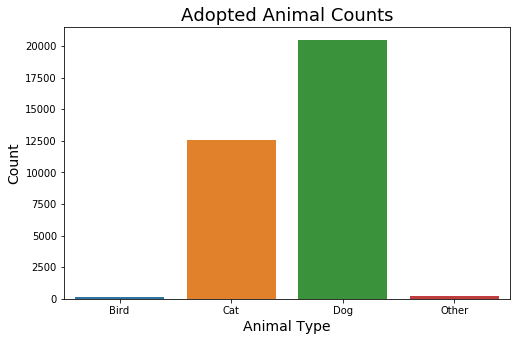

In [38]:
df_animals = df_adopted.groupby('Animal Type')[['Count']].sum()
plt.figure(figsize=(8,5))
sns.barplot(x=df_animals.index, y=df_animals['Count'])
plt.title('Adopted Animal Counts', fontsize=18)
plt.xlabel('Animal Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Cats are Dogs hold the majority, so we will use those for the rest of our analysis

In [39]:
df_adopted.drop(df_adopted[df_adopted['Animal Type'] == 'Bird'].index, inplace=True, axis=0)
df_adopted.drop(df_adopted[df_adopted['Animal Type'] == 'Other'].index, inplace=True, axis=0)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
df_adopted['Animal Type'].value_counts()

Dog    20489
Cat    12590
Name: Animal Type, dtype: int64

We predict that dogs and cats that are one year old, light-colored, short-haired, and with names have higher rates of adoption in Austin, Texas.

Let's make two separate dataframes for dogs and cats

In [41]:
df_dogs = df_adopted[df_adopted['Animal Type'] == 'Dog']
df_cats = df_adopted[df_adopted['Animal Type'] == 'Cat']

In [42]:
df_dogs.head()

,Outcome Age,Outcome Type,Sex Upon Outcome,Outcome Age (days),Outcome Age (years),Outcome Age Group,outcome_datetime,Outcome Month,Outcome Year,Outcome MY,...,Intake Age (years),Intake Age Group,Intake DateTime,Intake Month,Intake Year,Intake MY,Intake Weekday,Intake Hour,Time in Shelter,Time in Shelter (days)
Animal ID,,,,,,,,,,,,,,,,,,,,,
A200922,16 years,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,...,16.0,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,49 days 17:57:00.000000000,49.747917
A210457,17 years,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,...,17.0,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,9 days 00:29:00.000000000,9.020139
A226069,15 years,Adoption,Neutered Male,5475,15.0,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,...,15.0,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,23 days 02:31:00.000000000,23.104861
A249087,15 years,Adoption,Spayed Female,5475,15.0,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,...,15.0,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,89 days 20:32:00.000000000,89.855556
A274546,11 years,Adoption,Spayed Female,4015,11.0,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,...,11.0,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,2 days 18:08:00.000000000,2.755556


In [43]:
df_cats.head()

,Outcome Age,Outcome Type,Sex Upon Outcome,Outcome Age (days),Outcome Age (years),Outcome Age Group,outcome_datetime,Outcome Month,Outcome Year,Outcome MY,...,Intake Age (years),Intake Age Group,Intake DateTime,Intake Month,Intake Year,Intake MY,Intake Weekday,Intake Hour,Time in Shelter,Time in Shelter (days)
Animal ID,,,,,,,,,,,,,,,,,,,,,
A282897,13 years,Adoption,Neutered Male,4745,13.0,"(12.5, 15.0]",2015-07-11 16:49:00,7,2015,2015-07,...,13.0,"(12.5, 15.0]",2015-07-06 15:06:00,7,2015,2015-07,Monday,15,5 days 01:43:00.000000000,5.071528
A282897,12 years,Adoption,Neutered Male,4380,12.0,"(10.0, 12.5]",2013-12-28 17:05:00,12,2013,2013-12,...,12.0,"(10.0, 12.5]",2013-11-21 13:45:00,11,2013,2013-11,Thursday,13,37 days 03:20:00.000000000,37.138889
A295822,12 years,Adoption,Spayed Female,4380,12.0,"(10.0, 12.5]",2015-05-09 18:47:00,5,2015,2015-05,...,12.0,"(10.0, 12.5]",2014-11-16 14:14:00,11,2014,2014-11,Sunday,14,174 days 04:33:00.000000000,174.189583
A304036,13 years,Adoption,Neutered Male,4745,13.0,"(12.5, 15.0]",2015-06-14 16:09:00,6,2015,2015-06,...,13.0,"(12.5, 15.0]",2015-06-06 14:34:00,6,2015,2015-06,Saturday,14,8 days 01:35:00.000000000,8.065972
A307592,12 years,Adoption,Neutered Male,4380,12.0,"(10.0, 12.5]",2014-06-14 15:15:00,6,2014,2014-06,...,12.0,"(10.0, 12.5]",2014-05-24 11:22:00,5,2014,2014-05,Saturday,11,21 days 03:53:00.000000000,21.161806


Let's see how the distribution of adoptions change over the years

In [44]:
df_dog_years = df_dogs.groupby('Outcome Year')[['Count']].sum().reset_index()
df_cat_years = df_cats.groupby('Outcome Year')[['Count']].sum().reset_index()

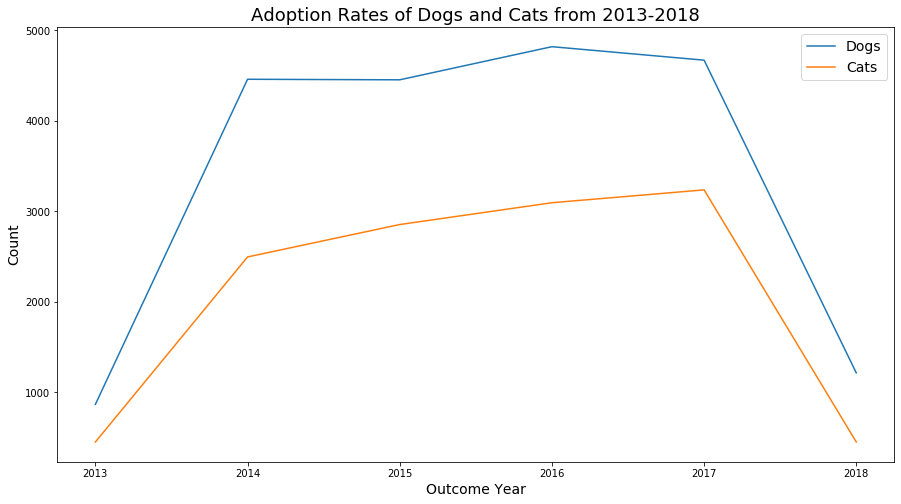

In [45]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Outcome Year', y='Count', data=df_dog_years, label='Dogs')
sns.lineplot(x='Outcome Year', y='Count', data=df_cat_years, label='Cats')
plt.title('Adoption Rates of Dogs and Cats from 2013-2018', fontsize=18)
plt.xlabel('Outcome Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=14)

We can conclude that the trend between how many dogs and cats are adopted has little to no difference

The low adoption counts in 2013 and 2018 are due to lack of data for those years

<h3> Hypothesis: older animals stay in shelter longer (one-year olds stay shortest)

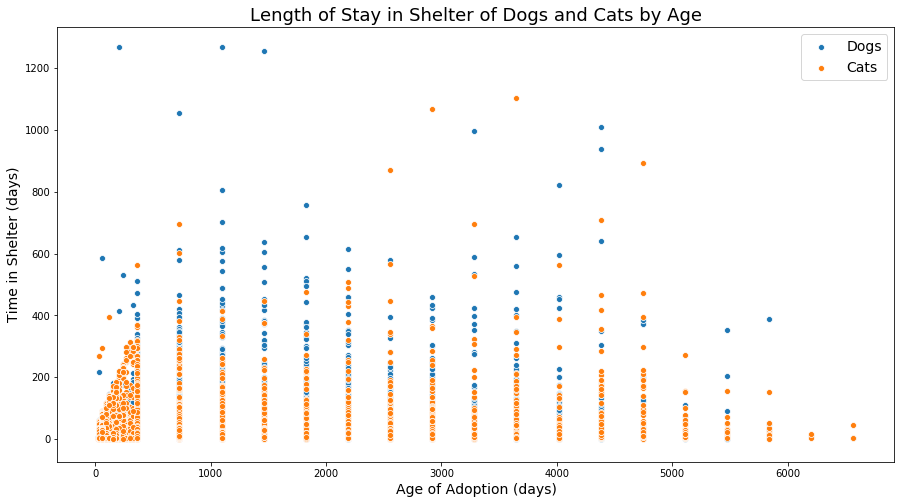

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_dogs['Outcome Age (days)'], y=df_dogs['Time in Shelter (days)'], label='Dogs')
sns.scatterplot(x=df_cats['Outcome Age (days)'], y=df_cats['Time in Shelter (days)'], label='Cats')
plt.title('Length of Stay in Shelter of Dogs and Cats by Age', fontsize=18)
plt.xlabel('Age of Adoption (days)', fontsize=14)
plt.ylabel('Time in Shelter (days)', fontsize=14)
plt.legend(fontsize=14)

From this, it doesn't look like there's any significant difference in the length of stay in the shelter as animals get older.  For every age group, there's always dogs and cats that are adopted within a couple of days

To get a better idea, lets drop rows where the length of stay are way outside of the main plot (greater than 600 days) for plotting purposes

Let's look by age group

In [47]:
df_dogs.drop(df_dogs[df_dogs['Time in Shelter (days)'] > 600].index, axis=0, inplace=True)
df_cats.drop(df_cats[df_cats['Time in Shelter (days)'] > 600].index, axis=0, inplace=True)

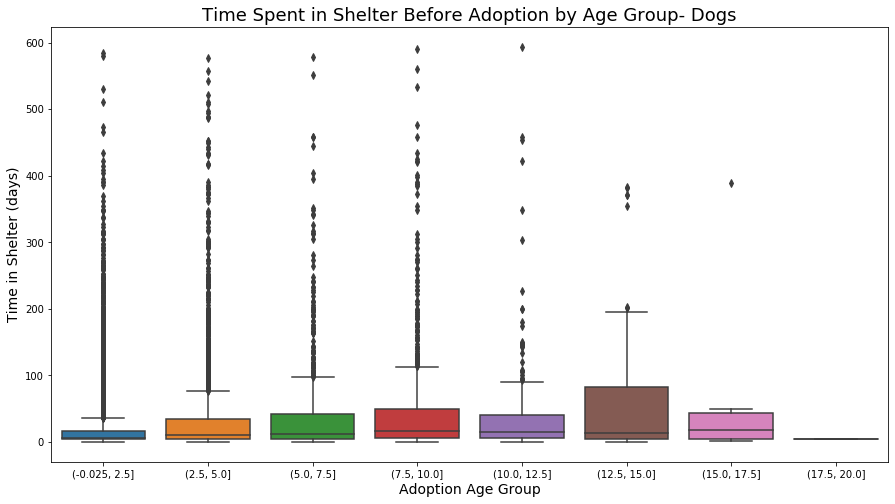

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_dogs['Outcome Age Group'], y=df_dogs['Time in Shelter (days)'], 
            order=['(-0.025, 2.5]', '(2.5, 5.0]', '(5.0, 7.5]', '(7.5, 10.0]', '(10.0, 12.5]',
                  '(12.5, 15.0]', '(15.0, 17.5]', '(17.5, 20.0]'])
plt.title('Time Spent in Shelter Before Adoption by Age Group- Dogs', fontsize=18)
plt.xlabel('Adoption Age Group', fontsize=14)
plt.ylabel('Time in Shelter (days)', fontsize=14)
plt.show()

For dogs, we can observe from the boxplot that the medians are roughly the same for all age groups.  However, the upper bound (max) increases while age increases, suggesting that older dogs are in fact more likely to stay in the shelter longer than younger ones

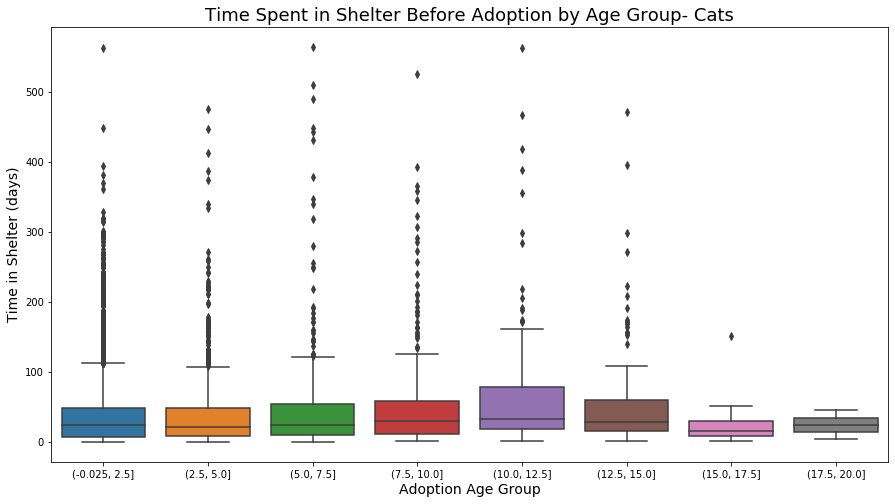

In [49]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_cats['Outcome Age Group'], y=df_cats['Time in Shelter (days)'], 
            order=['(-0.025, 2.5]', '(2.5, 5.0]', '(5.0, 7.5]', '(7.5, 10.0]', '(10.0, 12.5]',
                  '(12.5, 15.0]', '(15.0, 17.5]', '(17.5, 20.0]'])
plt.title('Time Spent in Shelter Before Adoption by Age Group- Cats', fontsize=18)
plt.xlabel('Adoption Age Group', fontsize=14)
plt.ylabel('Time in Shelter (days)', fontsize=14)
plt.show()

For cats, it seems that up until age 10, there's no observable correlation between how long the animal stays in the shelter vs how old they are.  In fact, when they get to the oldest age groups, they seem to be adopted more quickly than when they were younger

<h3> Hypothesis: light-colored animals that are fixed are adopted more quickly
    

As you can see, there are a LOT of colors, so let's try to standardize them.  Any animals that have any black or brown colors will stay that way, and any light colored will be white

In [50]:
df_cats['Color'].unique()

array(['Black Smoke/White', 'Black', 'Brown Tabby/White',
       'Orange Tabby/White', 'Lilac Point', 'Brown Tabby', 'Tortie',
       'Black/White', 'Brown Tabby/Agouti', 'Blue/White', 'White',
       'Flame Point', 'Calico', 'Seal Point', 'Black Tabby', 'Blue Cream',
       'Black Smoke', 'White/Brown Tabby', 'Brown Tabby/Orange',
       'Blue Tabby', 'Torbie', 'Blue Cream/Tortie', 'Calico Point',
       'Orange Tabby', 'Blue', 'Blue Tabby/White', 'White/Orange Tabby',
       'Lynx Point', 'Tortie Point', 'White/Gray', 'Blue Point/White',
       'Cream Tabby', 'White/Black', 'Gray Tabby/White', 'Tortie/White',
       'Cream Tabby/White', 'Blue Point', 'White/Blue', 'Brown Tiger',
       'Chocolate Point', 'White/Orange', 'White/Cream',
       'Calico/Brown Tabby', 'Silver Tabby/White',
       'Blue Cream/Blue Tabby', 'Tortie/Blue Cream', 'Gray Tabby',
       'Silver Tabby', 'White/Gray Tabby', 'Chocolate', 'White/Brown',
       'Calico/Blue Cream', 'Brown/Black', 'Gray/White',
       

In [51]:
df_dogs['Color'].unique()

array(['Black/Tan', 'Tan/Black', 'Sable/White', 'Black/Brown', 'Tricolor',
       'Black/Brown Brindle', 'Brown', 'Black/White', 'Brown/Black',
       'Tan', 'Black', 'Blue', 'Brown/White', 'Red/Black', 'White/Tan',
       'White/Brown', 'White/Brown Merle', 'White/Gray',
       'Blue Tick/Brown', 'Chocolate', 'White/Tricolor', 'Tan/Buff',
       'Chocolate/White', 'Red/White', 'Brown Brindle/White',
       'Black Brindle/White', 'Cream/Black', 'White', 'Sable',
       'Tan/White', 'Buff', 'Buff/White', 'Gold', 'Black/Tricolor',
       'White/Black', 'White/Red Merle', 'Blue/White', 'Gray/Black',
       'Brown Brindle', 'White/Chocolate', 'Blue Merle', 'Red',
       'Chocolate/Tan', 'Cream/White', 'Brown Brindle/Tan',
       'White/Brown Brindle', 'White/Buff', 'Brown/Tan', 'Cream/Yellow',
       'Gray/White', 'Gray/Gold', 'Fawn/White', 'Black Tiger/White',
       'Red Tick/Red', 'Yellow', 'Brown Merle/White', 'Black Brindle',
       'Gray', 'Black Smoke/White', 'Cream', 'Blue Tiger/Wh

In [52]:
def standardize_color(string):
    string = string.lower()
    string = string.strip()
    
    if 'black' in string:
        output = 'Black'
    elif 'brown' in string or 'liver' in string or 'chocolate' in string or 'buff' in string or 'agouti' in string or 'sable' in string:
        output = 'Brown'
    elif 'gray'in string:
        output = 'Gray'
    elif 'tri' in string:
        output = 'Tricolor'
    elif 'blue' in string:
        output = 'Blue'
    elif 'red' in string:
        output = 'Red'
    elif 'white' in string:
        output = 'White'
    elif 'gold' in string:
        output = 'Gold'
    elif 'tan' in string or 'fawn' in string:
        output = 'Tan'
    elif 'yellow' in string or 'cream' in string or 'apricot' in string:
        output = 'Yellow'
    #specifically for cats
    elif 'calico' in string:
        output = 'Calico'
    elif 'orange' in string:
        output = 'Orange'
    elif 'tortie' in string or 'torbie' in string:
        output = 'White'
    elif 'point' in string:
        output = 'White'
    elif 'silver' in string:
        output = 'Silver'
    else:
        output = string
    
    return output
    

In [53]:
df_dogs['Color'] = df_dogs['Color'].apply(standardize_color)
df_cats['Color'] = df_cats['Color'].apply(standardize_color)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
df_dogs['Color'].unique()

array(['Black', 'Brown', 'Tricolor', 'Tan', 'Blue', 'White', 'Gray',
       'Red', 'Gold', 'Yellow', 'Silver'], dtype=object)

In [55]:
df_cats['Color'].unique()

array(['Black', 'Brown', 'White', 'Blue', 'Calico', 'Orange', 'Gray',
       'Yellow', 'Silver', 'Tan', 'Tricolor', 'Red'], dtype=object)

Let's see how color correlates with age group for dogs and cats using heatmaps:

In [56]:
#make pivot tables with dogs and cats
df_d = df_dogs[['Color', 'Outcome Age Group', 'Time in Shelter (days)']]
df_d = df_d.groupby(['Color', 'Outcome Age Group'], as_index=False).mean()
dog_pivot = df_d.pivot(index='Outcome Age Group', columns='Color')

df_c = df_cats[['Color', 'Outcome Age Group', 'Time in Shelter (days)']]
df_c = df_c.groupby(['Color', 'Outcome Age Group'], as_index=False).mean()
cat_pivot = df_c.pivot(index='Outcome Age Group', columns='Color')

#make the age groups in order
dog_pivot = dog_pivot.reindex(['(-0.025, 2.5]', '(2.5, 5.0]', '(5.0, 7.5]', '(7.5, 10.0]', '(10.0, 12.5]',
                               '(12.5, 15.0]', '(15.0, 17.5]', '(17.5, 20.0]'], axis=0)
cat_pivot = cat_pivot.reindex(['(-0.025, 2.5]', '(2.5, 5.0]', '(5.0, 7.5]', '(7.5, 10.0]', '(10.0, 12.5]',
                               '(12.5, 15.0]', '(15.0, 17.5]', '(17.5, 20.0]'], axis=0)

print('Pivot Table for Dogs: ', dog_pivot)
print('Pivot Table for Cats: ', cat_pivot)

Pivot Table for Dogs:                    Time in Shelter (days)                                    \
Color                              Black        Blue      Brown       Gold   
Outcome Age Group                                                            
(-0.025, 2.5]                  17.504699   26.343292  21.602324  12.282841   
(2.5, 5.0]                     36.324773   59.458001  39.007751  15.628993   
(5.0, 7.5]                     39.161617   45.777469  49.329072   6.567014   
(7.5, 10.0]                    50.961290   49.407557  54.371867  67.914236   
(10.0, 12.5]                   46.037987  180.362847  77.710595        NaN   
(12.5, 15.0]                   84.488278         NaN  79.544599        NaN   
(15.0, 17.5]                   28.907639         NaN   1.895139        NaN   
(17.5, 20.0]                         NaN         NaN        NaN        NaN   

                                                                         \
Color                   Gray        Red    

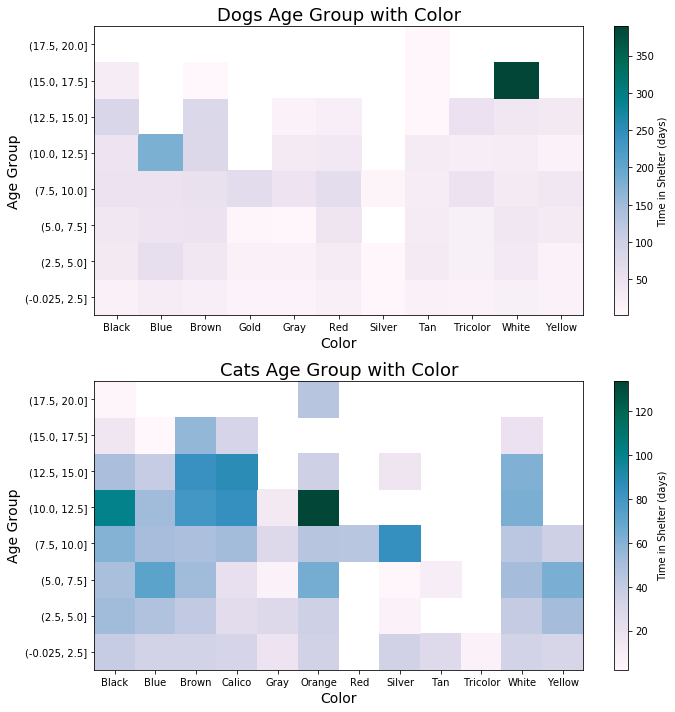

In [57]:
#make heatmaps
fig, (ax0, ax1) = plt.subplots(2,1, figsize=(10,10))
row_labels = dog_pivot.columns.levels[1]
col_labels = dog_pivot.index

d = ax0.pcolor(dog_pivot, cmap='PuBuGn')
ax0.set_xticks(np.arange(dog_pivot.shape[1]) + 0.5, minor=False)
ax0.set_yticks(np.arange(dog_pivot.shape[0]) + 0.5, minor=False)

ax0.set_xticklabels(row_labels, minor=False)
ax0.set_yticklabels(col_labels, minor=False)

ax0.set_title('Dogs Age Group with Color', fontsize=18)
ax0.set_xlabel('Color', fontsize=14)
ax0.set_ylabel('Age Group', fontsize=14)

fig.colorbar(d, ax=ax0, label='Time in Shelter (days)')


c = ax1.pcolor(cat_pivot, cmap='PuBuGn')
row_labels = cat_pivot.columns.levels[1]
col_labels = cat_pivot.index

ax1.set_xticks(np.arange(cat_pivot.shape[1]) + 0.5, minor=False)
ax1.set_yticks(np.arange(cat_pivot.shape[0]) + 0.5, minor=False)

ax1.set_xticklabels(row_labels, minor=False)
ax1.set_yticklabels(col_labels, minor=False)

ax1.set_title('Cats Age Group with Color', fontsize=18)
ax1.set_xlabel('Color', fontsize=14)
ax1.set_ylabel('Age Group', fontsize=14)

fig.colorbar(c, ax=ax1, label='Time in Shelter (days)')

fig.tight_layout()
plt.show()

From these heatmaps, we can see that as age increases, length of stay increases for both cats and dogs.  For both cats and dogs, the length of stay is slightly shorter for lighter colors (white, yellow, tan, silver), suggesting that our hypothesis that lighter colored animals are adopted more quickly

<h2> Hypothesis: Animals that are fixed have shorter length of stay in shelter

Now let's view the values of whether the dogs and cats are fixed (Sex upon outcome)

In [58]:
print('Dogs Sex Upon Outcome:\n', df_dogs['Sex Upon Outcome'].value_counts())
print('Cats Sex Upon Outcome:\n', df_cats['Sex Upon Outcome'].value_counts())

Dogs Sex Upon Outcome:
 Neutered Male    10217
Spayed Female     9702
Intact Female      281
Intact Male        267
Name: Sex Upon Outcome, dtype: int64
Cats Sex Upon Outcome:
 Spayed Female    6048
Neutered Male    5785
Intact Female     439
Intact Male       308
Unknown             1
Name: Sex Upon Outcome, dtype: int64


Let's drop the unknown row from cats

In [59]:
df_cats.drop(df_cats[df_cats['Sex Upon Outcome'] == 'Unknown'].index, axis=0, inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
print('Dogs Sex Upon Outcome:\n', df_dogs['Sex Upon Outcome'].value_counts())
print('Cats Sex Upon Outcome:\n', df_cats['Sex Upon Outcome'].value_counts())

Dogs Sex Upon Outcome:
 Neutered Male    10217
Spayed Female     9702
Intact Female      281
Intact Male        267
Name: Sex Upon Outcome, dtype: int64
Cats Sex Upon Outcome:
 Spayed Female    6048
Neutered Male    5785
Intact Female     439
Intact Male       308
Name: Sex Upon Outcome, dtype: int64


Let's use heatmaps to see the correlations between Color and Sex Upon Outcome, and how they impact Length of Stay in shlether before adoption!

In [61]:
#make pivot tables with dogs and cats
df_d2 = df_dogs[['Color', 'Sex Upon Outcome', 'Time in Shelter (days)']]
df_d2 = df_d2.groupby(['Color', 'Sex Upon Outcome'], as_index=False).mean()
dog_pivot2 = df_d2.pivot(index='Sex Upon Outcome', columns='Color')

df_c2 = df_cats[['Color', 'Sex Upon Outcome', 'Time in Shelter (days)']]
df_c2 = df_c2.groupby(['Color', 'Sex Upon Outcome'], as_index=False).mean()
cat_pivot2 = df_c2.pivot(index='Sex Upon Outcome', columns='Color')

print('Pivot Table for Dogs: ', dog_pivot2)
print('Pivot Table for Cats: ', cat_pivot2)

Pivot Table for Dogs:                   Time in Shelter (days)                                   \
Color                             Black       Blue      Brown       Gold   
Sex Upon Outcome                                                           
Intact Female                 14.544488  11.605351   9.668618        NaN   
Intact Male                   11.381123  15.869444  21.648559  16.957639   
Neutered Male                 22.569422  34.651469  28.218159  12.275862   
Spayed Female                 22.983098  34.037441  25.945061  24.365432   

                                                                        \
Color                  Gray        Red    Silver        Tan   Tricolor   
Sex Upon Outcome                                                         
Intact Female      0.480208  16.193109       NaN  18.076111  20.996732   
Intact Male       13.652431   5.971875       NaN  11.365389  11.867431   
Neutered Male     15.509158  27.076024  3.154514  20.987202  15.425960   


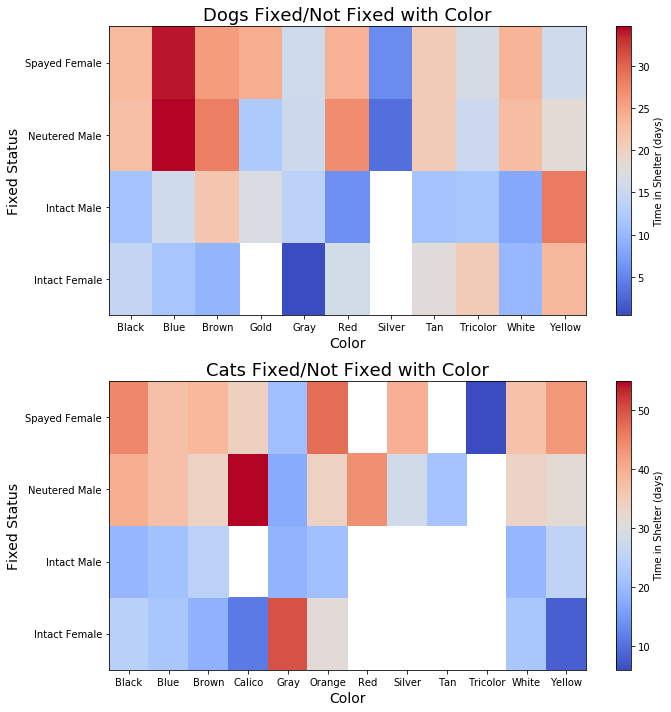

In [62]:
#make heatmaps
fig, (ax0, ax1) = plt.subplots(2,1, figsize=(10,10))
row_labels = dog_pivot2.columns.levels[1]
col_labels = dog_pivot2.index

d = ax0.pcolor(dog_pivot2, cmap='coolwarm')
ax0.set_xticks(np.arange(dog_pivot2.shape[1]) + 0.5, minor=False)
ax0.set_yticks(np.arange(dog_pivot2.shape[0]) + 0.5, minor=False)

ax0.set_xticklabels(row_labels, minor=False)
ax0.set_yticklabels(col_labels, minor=False)

ax0.set_title('Dogs Fixed/Not Fixed with Color', fontsize=18)
ax0.set_xlabel('Color', fontsize=14)
ax0.set_ylabel('Fixed Status', fontsize=14)

fig.colorbar(d, ax=ax0, label='Time in Shelter (days)')


c = ax1.pcolor(cat_pivot2, cmap='coolwarm')
row_labels = cat_pivot2.columns.levels[1]
col_labels = cat_pivot2.index

ax1.set_xticks(np.arange(cat_pivot2.shape[1]) + 0.5, minor=False)
ax1.set_yticks(np.arange(cat_pivot2.shape[0]) + 0.5, minor=False)

ax1.set_xticklabels(row_labels, minor=False)
ax1.set_yticklabels(col_labels, minor=False)

ax1.set_title('Cats Fixed/Not Fixed with Color', fontsize=18)
ax1.set_xlabel('Color', fontsize=14)
ax1.set_ylabel('Fixed Status', fontsize=14)

fig.colorbar(c, ax=ax1, label='Time in Shelter (days)')

fig.tight_layout()
plt.show()

Surprisingly, these show that for both dogs and cats, it seems as though intact animals are adopted more quickly than fixed animals, while there's also a trend that lighter-colored animals are adopted more quickly than darker colored animals as well, supporting our hypothesis


<h1> Dataset 2

<h4> Now, since we also want to look at whether animals with names are more likely to be adopted, we are looking at the second dataset that contains information of animals that left the shelter with additional information about animal's names.

In [63]:
df2 = pd.read_csv('Austin_Animal_Center_Outcomes.csv')
df2.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
1,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
2,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
3,A680969,*Zeus,08/05/2014 04:59:00 PM,08/05/2014 04:59:00 PM,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
4,A684617,NaN,07/27/2014 09:00:00 AM,07/27/2014 09:00:00 AM,07/26/2012,Transfer,SCRP,Cat,Intact Female,2 years,Domestic Shorthair Mix,Black


In [64]:
#get a general idea about the dataset
df2.shape

(110753, 12)

In [65]:
#we want to look at the column names to see what information is included
df2.columns.values

array(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth',
       'Outcome Type', 'Outcome Subtype', 'Animal Type',
       'Sex upon Outcome', 'Age upon Outcome', 'Breed', 'Color'],
      dtype=object)

In [66]:
#instead of dropping null names, we want to replace those with "No Name"
df2['Name'].fillna('No Name', inplace=True)

In [67]:
#we only want to look at data for dogs and cats
df2_dogs = df2[df2['Animal Type'] == 'Dog']
df2_cats = df2[df2['Animal Type'] == 'Cat']
df2_dogncat = pd.concat([df2_dogs, df2_cats])

In [68]:
# we care about only certain outcome types, so let's check what kinds of outcomes there are
df2_dogncat['Outcome Type'].value_counts()

Adoption           47731
Transfer           32313
Return to Owner    19537
Euthanasia          3436
Died                 843
Rto-Adopt            500
Missing               63
Disposal              60
Name: Outcome Type, dtype: int64

In [69]:
# amoung all the different outcomes, we want to look at those getting adopted, transferred , or euthanized
df2_adopted = df2_dogncat[df2_dogncat['Outcome Type'] == 'Adoption']
df2_transfered = df2_dogncat[df2_dogncat['Outcome Type'] == 'Transfer']
df2_euthanized = df2_dogncat[df2_dogncat['Outcome Type'] == 'Euthanasia']

In [70]:
# concat to get the filtered dataset
df2=pd.concat([df2_adopted,df2_transfered,df2_euthanized])
df2.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
12,A725530,King,06/09/2016 02:50:00 PM,06/09/2016 02:50:00 PM,10/30/2015,Adoption,NaN,Dog,Neutered Male,7 months,Pit Bull Mix,Brown Brindle/White
16,A738919,Milo,11/27/2016 05:35:00 PM,11/27/2016 05:35:00 PM,09/23/2016,Adoption,NaN,Dog,Neutered Male,2 months,Black Mouth Cur Mix,Brown/Black
19,A665383,Indica,10/30/2013 04:23:00 PM,10/30/2013 04:23:00 PM,06/19/2013,Adoption,NaN,Dog,Spayed Female,4 months,German Shepherd Mix,Black/Tan
22,A689228,Louie,12/05/2014 03:55:00 PM,12/05/2014 03:55:00 PM,06/01/2014,Adoption,NaN,Dog,Neutered Male,6 months,Dachshund/Chihuahua Shorthair,Sable/Tan


In [71]:
#drop all values that we do not need, now it should be a cleaned dataset
df2.drop(['DateTime','MonthYear','Date of Birth','Outcome Subtype'], axis=1, inplace=True)
df2.head()

,Animal ID,Name,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A720371,Moose,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
12,A725530,King,Adoption,Dog,Neutered Male,7 months,Pit Bull Mix,Brown Brindle/White
16,A738919,Milo,Adoption,Dog,Neutered Male,2 months,Black Mouth Cur Mix,Brown/Black
19,A665383,Indica,Adoption,Dog,Spayed Female,4 months,German Shepherd Mix,Black/Tan
22,A689228,Louie,Adoption,Dog,Neutered Male,6 months,Dachshund/Chihuahua Shorthair,Sable/Tan


<h2> Hypothesis: dogs and catts with names are more likely to be adopted

In [72]:
df2.shape

(83480, 8)

In [73]:
df2['Name'].value_counts()

No Name        28184
Bella            290
Luna             290
Max              279
Daisy            228
               ...  
*Pearlman          1
*Marco Polo        1
Dobi               1
*Opie Lulu         1
Castiel            1
Name: Name, Length: 15113, dtype: int64

In [74]:
df2_adopted.shape

(47731, 12)

In [75]:
df2_adopted['Name'].value_counts()

No Name         8794
Luna             243
Bella            219
Max              213
Daisy            169
                ... 
Flynn Ryder        1
Segny              1
*Sadie Grace       1
*Velcro            1
*Beachball         1
Name: Name, Length: 11818, dtype: int64

In [76]:
#look at the dataset with combined outcome types of adopted, transerfed and euthanized
num_total=df2.shape[0]
num_total_noname=df2['Name'].value_counts()[0]
ratio_total_noname=num_total_noname/num_total

#look at the dateset with only adopted dogs and cats
num_adopted=df2_adopted.shape[0]
num_adopted_noname=df2_adopted['Name'].value_counts()[0]
ratio_adopted_noname=num_adopted_noname/num_adopted

print('Percentage No Name Total: ', ratio_total_noname, '\nPercentage No Name Adopted:', ratio_adopted_noname)

Percentage No Name Total:  0.337613799712506 
Percentage No Name Adopted: 0.18424084976220906


In [77]:
percent_diff=(ratio_total_noname-ratio_adopted_noname)/ratio_total_noname
print(percent_diff)

0.45428519237336035


Not surprising at all, we can see that there is a very significant difference (about 45.4% ) for the no name ratio when comparing the combined outcomes (adopted, transfered and euthanized) and only the adopted outcome. The adopted animals has a much smaller rate for not having a name.

<h1> Data Analysis and Results

First, we import needed statistical libraries: patsy and stats models

In [78]:
import patsy
import statsmodels.api as sm

Rename columns to remove whitespaces.  We do it to use them in patsy R-like formulas

In [79]:
df_dogs_renamed = df_dogs.rename(columns={'Time in Shelter (days)': "days_in_shelter", "Outcome Age Group": "age", "Color": "color", "Sex Upon Outcome": "sex"})
df_cats_renamed = df_cats.rename(columns={'Time in Shelter (days)': "days_in_shelter", "Outcome Age Group": "age", "Color": "color", "Sex Upon Outcome": "sex"})

In [80]:
outcome_1, predictors_1 = patsy.dmatrices('days_in_shelter ~ age + color + sex', data=df_dogs_renamed)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit() 
print(res_1.summary())
print(res_1.pvalues)

                            OLS Regression Results                            
Dep. Variable:        days_in_shelter   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     48.74
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          4.73e-189
Time:                        18:29:07   Log-Likelihood:            -1.0736e+05
No. Observations:               20467   AIC:                         2.148e+05
Df Residuals:                   20446   BIC:                         2.149e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.9172 

In [81]:
outcome_2, predictors_2 = patsy.dmatrices('days_in_shelter ~ age', data=df_dogs_renamed)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit() 
print(res_2.summary())
print(res_2.pvalues)

                            OLS Regression Results                            
Dep. Variable:        days_in_shelter   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     112.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          7.97e-163
Time:                        18:29:17   Log-Likelihood:            -1.0745e+05
No. Observations:               20467   AIC:                         2.149e+05
Df Residuals:                   20459   BIC:                         2.150e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.9875    

In [82]:
outcome_3, predictors_3 = patsy.dmatrices('days_in_shelter ~ color', data=df_dogs_renamed)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())
print(res_3.pvalues)


                            OLS Regression Results                            
Dep. Variable:        days_in_shelter   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     12.56
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.44e-22
Time:                        18:29:25   Log-Likelihood:            -1.0777e+05
No. Observations:               20467   AIC:                         2.156e+05
Df Residuals:                   20456   BIC:                         2.157e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.5177      0.54

In [83]:
outcome_4, predictors_4 = patsy.dmatrices('days_in_shelter ~ sex', data=df_dogs_renamed)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit() 
print(res_4.summary())
print(res_4.pvalues)

                            OLS Regression Results                            
Dep. Variable:        days_in_shelter   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.939
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.48e-06
Time:                        18:29:36   Log-Likelihood:            -1.0782e+05
No. Observations:               20467   AIC:                         2.157e+05
Df Residuals:                   20463   BIC:                         2.157e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               13.0853 

From above, we can see the different correlations beyween the days_in_shelter attribute, which is the main target we are measuring, compared to sex, color, age correlations and p-values. For the first result, there is a display of the OLS Regression Results based on the days in the shelter and all of the attributes that we would like to examine. It is evident that there is in fact a significance between certain attributes based on the P-values. To begin, the attribute of age shows a significance towards the age (17.5 to 20.0). We hypothesized that dogs that were younger would be adopted quicker but that was not the case. In regard to color, based on the p-values it is evident that there is a leniency towards light colored animals such as gold, silver, tan, and white. We hypothesized that lighter colored dogs and cats would be adopted faster and this proved to be correct based on our data. As for sex, to our suprise, there is significance towards Intact Males rather than spayed/neutered. There is an OLS Regression for each of the attributes under the cumulative result.

<h1> Ethics/Privacy Considerations

In regard to ethical and privacy considerations, the information that we used was from a public government website. Therefore, there is no need for direct permission to use the datasets. The information has also been used in a very similiar context and there is no harm in doing so. As for privacy concerns and terms of use, the animals are identified by an ID number and there is no method of finding any personal information regarding the animals or anyone involved. The risk of deanonimization is highly unlikely due to no private information such as addresses. We believe that there are no biases within the data and within our project as the data is from a publicly released and reliable source. Although we took caution, the data is factual and objective and there is little to very minimal biases. The dataset includes all animals that have been in the animal shelter, without regard to their species.

Due to the population which is recorded (animals), we did not have any challenges in regard to data privacy. The dataset itself did not include any information that is very private. In the case that the animal was adopted, it did not provide information of the owner in regards to home address or phone number. We had no issues with our dataset and made sure that we were following proper ethical and privacy procedures.

A potential consequence is that in the event that this project is published people who read it will only want to adopt young, light-colored dogs/cats. Other types of animals may not be considered "adoptable". For example, as of right now, the Gordon setter, Irish water spaniel, are Kerry blue terrier, all dark-colored dog breeds, are in danger of extinction. It would be unfair for any animal to be passed over for adoption because they are not trendy.

<h1> Conclusion/Discussion
    

Through our data analysis and cleaning, we were able to investigate whether there were underlyign trends between certain attributes that may entice a person to adopt a specifc dog/cat over another. Due to the popularity of dogs and cats, we chose to limit our analysis to those two types. We predicted that dogs and cats that are one year old, light-colored, and with names have higher rates of adoption in Austin, Texas. Although we made no prediction in regard to which animal gets adopted the most, it is interesting to note that there is no difference in how many dogs and cats are adopted. To begin, we analyzed the stay of the animal to see if age had an impact. Through a box plot, we observed that there is not much of a difference in stay correlated to age. For dogs specifically, the medians are roughly the same for all ages but there is an increase in the upper bound (max) as age increases which does indicate a longer stay for older dogs. For cats, there is no observable correlation between length of stay and age. Instead, it is apparent that as cats get older, they seem to be adopted more quickly. Next, we aimed to figure out whether light colored animals that are fixed are more likely to be adopted faster. In order to figure this out, the colors were standardized due to being alot of variation in colors. It was standardized to Brown, Black, and White. Through the creation of heatmaps, it is evident that as age increases, length of stay increases as well as length of stay is shorter for lighter colors for both dogs and cats. With the name attribute, we used another dataset and find out that when comparing dogs and cats that only get adopted and those also get transfered and euthanized, there is signifinant difference between the ratio of animals with no name. The animals get adopted have a much smaller rate of not having a name.

Our hypothesis that dogs and cats that are one year old, light-colored, and with names will have shorter shelter stay times in Austin, Texas can be further proved with exploration of the antithesis - dogs and cats that are over 8 years old, dark-colored, and unnamed will have longer shelter stay times or be euthanized. This specific analysis will not be investigated in depth since the attributes of the antithesis are underlying components in the analysis section.

In the background part, we mentioned that we hope our project can help the running of the animal shelter because local news indicate that they are turning healthy animals away due to limited space. Hopefully the analyzed part above about the adopted animals types can provide some insights to them. In terms of giving suggestions to the animal shelter, since they cannot have control on the age, breed or color of the animals, a possible way to raise the possibility for the animals to be adopted is that staffs in the shelter can give animals names, making them more appealing and easier to connect with potential adopters.